In [17]:
import os
import geemap
import whitebox
import laspy


In [1]:
import sys
print(sys.executable)

/Users/gigisung/anaconda3/envs/geo/bin/python


In [6]:
wbt = whitebox.WhiteboxTools()
wbt.set_working_dir(os.getcwd())
wbt.set_verbose_mode(False)

0

In [ ]:
url = 'https://github.com/giswqs/data/raw/main/lidar/madison.laz'
if not os.path.exists('madison.laz'):
    geemap.download_file(url)

In [7]:
laz = geemap.read_lidar('madison.laz')

In [8]:
laz

<LasData(1.2, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 4879433 points, 1 vlrs)>

In [13]:
str(laz.header.version)

'1.2'

In [12]:
las = geemap.convert_lidar(laz, file_version='1.4')

In [14]:
geemap.write_lidar(las, 'madison.las')

In [15]:
wbt.lidar_histogram('madison.las', 'histogram.html')

0

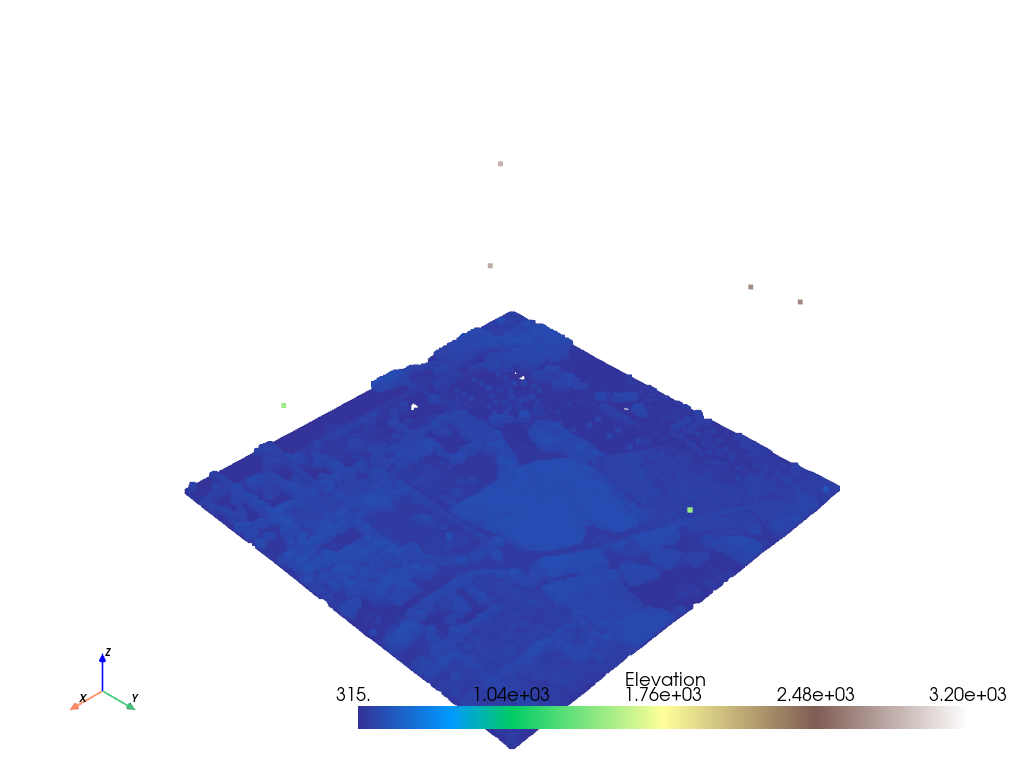

In [20]:
geemap.view_lidar('madison.las')

In [21]:
wbt.lidar_elevation_slice("madison.las", "madison_rm.las", minz=0, maxz=450)


0

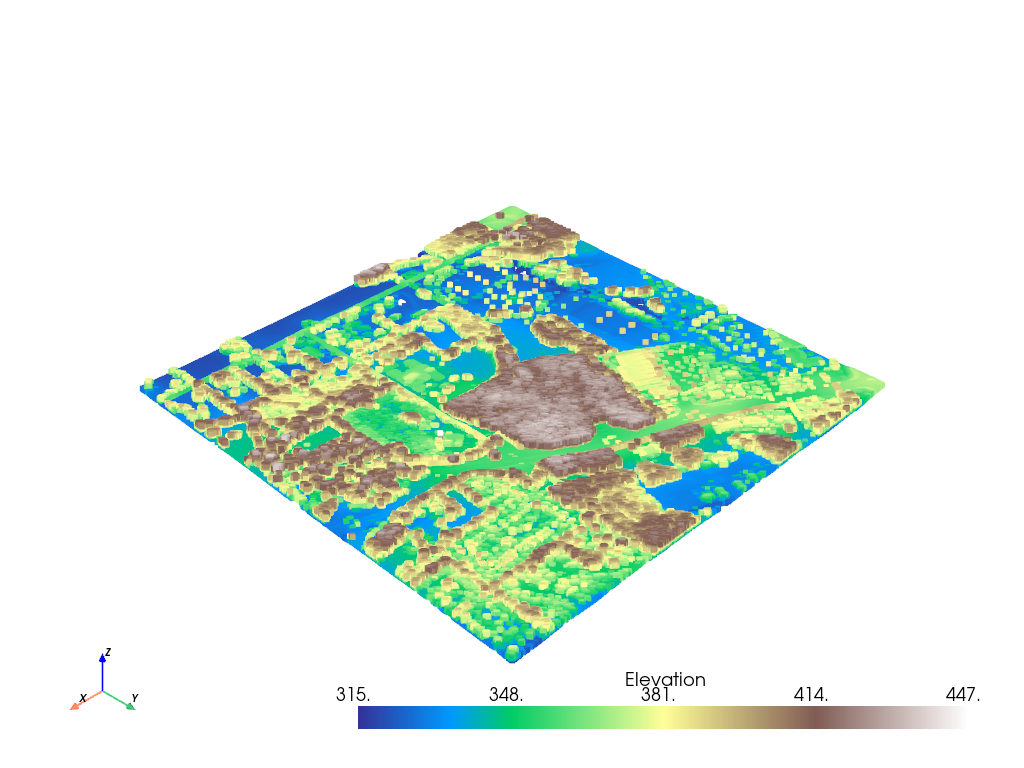

In [22]:
geemap.view_lidar('madison_rm.las', cmap='terrain')

## Create DSM

In [23]:
wbt.lidar_digital_surface_model(
    'madison_rm.las', 'dsm.tif', resolution=1.0, minz=0, maxz=450
)

0

In [24]:
geemap.add_crs("dsm.tif", epsg=2255)

In [25]:
m = geemap.Map()
m.add_raster('dsm.tif', palette='terrain', layer_name='DSM')
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…